In [12]:

import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('/Users/amitmishra/Downloads/Datasets/width_height.csv')

In [11]:
df

,Width,Height
0,25,24
1,25,25
2,25,25
3,21,24
4,24,24
5,30,29
6,25,25
7,25,25
8,27,29
9,25,29


In [14]:
iso_forest = IsolationForest(
    contamination=0.1,  # Expect ~10% outliers
    random_state=42,
    n_estimators=100
)

In [21]:
X = df[['Width', 'Height']]  # Only use the original features
predictions = iso_forest.fit_predict(X)
anomaly_scores = iso_forest.score_samples(X)

In [22]:
# Add results to dataframe
df['Anomaly'] = predictions  # -1 for anomaly, 1 for normal
df['Anomaly_Score'] = anomaly_scores  # Lower scores = more anomalous

In [23]:
df

,Width,Height,Anomaly,Anomaly_Score
0,25,24,1,-0.458812
1,25,25,1,-0.387166
2,25,25,1,-0.387166
3,21,24,-1,-0.684846
4,24,24,1,-0.509427
5,30,29,-1,-0.609460
6,25,25,1,-0.387166
7,25,25,1,-0.387166
8,27,29,1,-0.507020
9,25,29,1,-0.482692


In [24]:
# Identify anomalies
anomalies = df[df['Anomaly'] == -1]
normal_points = df[df['Anomaly'] == 1]

In [25]:
print(f"\nDetected {len(anomalies)} anomalies:")
print(anomalies[['Width', 'Height']])


Detected 3 anomalies:
    Width  Height
3      21      24
5      30      29
21     29      25


In [26]:
# Check if your specific point in question (30, 22) would be an anomaly

print(f"Model was trained on features: {df.columns.tolist()}")
print(f"Using features for prediction: ['Width', 'Height']")

Model was trained on features: ['Width', 'Height', 'Anomaly', 'Anomaly_Score']
Using features for prediction: ['Width', 'Height']


In [27]:
test_point = np.array([[30, 22]])
print(f"Test point shape: {test_point.shape}")
print(f"Training data shape: {df[['Width', 'Height']].shape}")

Test point shape: (1, 2)
Training data shape: (25, 2)


In [28]:
# Use only Width and Height columns for prediction
prediction = iso_forest.predict(test_point)
score = iso_forest.score_samples(test_point)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [29]:
print(f"\nTesting point (30, 22):")
print(f"Prediction: {'Anomaly' if prediction[0] == -1 else 'Normal'}")
print(f"Anomaly Score: {score[0]:.4f}")


Testing point (30, 22):
Prediction: Anomaly
Anomaly Score: -0.6642


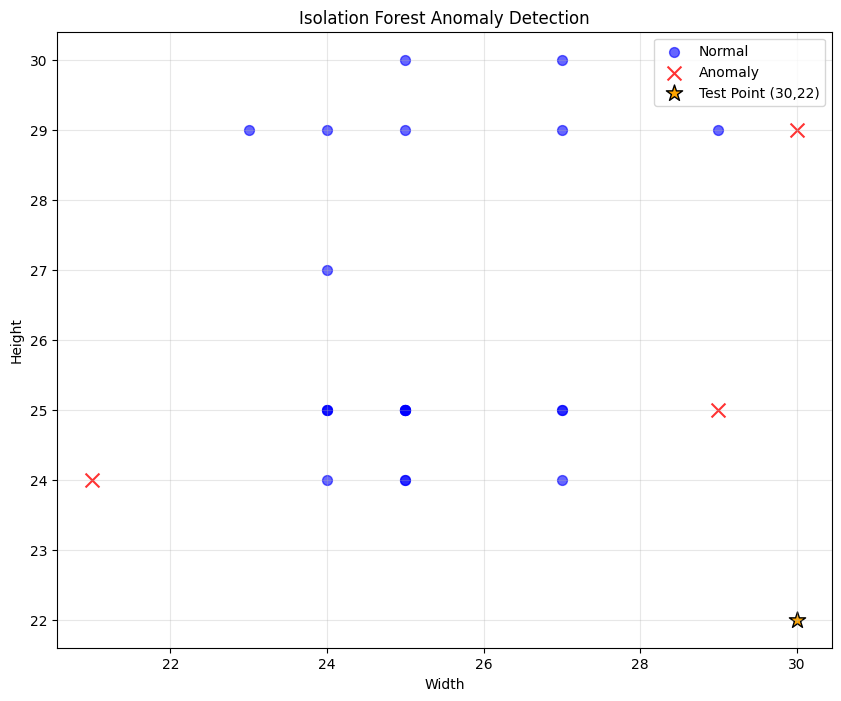

In [30]:
# Visualize the results
plt.figure(figsize=(10, 8))

# Plot normal points
plt.scatter(normal_points['Width'], normal_points['Height'], 
           c='blue', label='Normal', alpha=0.6, s=50)

# Plot anomalies
plt.scatter(anomalies['Width'], anomalies['Height'], 
           c='red', label='Anomaly', alpha=0.8, s=100, marker='x')

# Plot test point
plt.scatter(30, 22, c='orange', label='Test Point (30,22)', 
           s=150, marker='*', edgecolors='black')

plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()